# Project: Data Wrangling and Analysis. 
This project is all about data wrangling of tweeter data WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. Three different files are provided to analyse the data.  

## Import Python Libraries 

In [1]:
# Import python libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# Import python libraries to read data from various types of files.
import os
import requests
import json
import re 
import glob

## Data Gathering

### Gathering Data from CSV file

In [3]:
# Read data from csv file
df=pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Gathering data from tsv file

In [5]:
# Access the data from website using url or from tsv file
folder_name = 'new_folder'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

with open(os.path.join(folder_name, url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)
    
# Manual Method
#with open("image-predictions.tsv", mode='wb') as file:
    #file.write(response.content)   

In [6]:
# Read the data from .tsv file
df_image=pd.read_csv('image-predictions.tsv',sep='\t') 

In [7]:
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Gathering data using  Tweeter API key

In [8]:
# Read the data from   json file
df_tweeter=pd.read_json('tweet_json.txt',lines=True)

In [9]:
df_tweeter.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
       'quoted_status'],
      dtype='object')

In [10]:
# Create the table which should consists of id, retweet_count and favorite_count from tweeter file. 
df_tweet=df_tweeter[['id','retweet_count','favorite_count']]

In [11]:
# Rename the id column by tweet_id
df_tweet.rename(columns={'id':'tweet_id'},inplace=True)

C:\Users\SohamGaikwad\AppData\Local\Temp\ipykernel_7064\1241024857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tweet.rename(columns={'id':'tweet_id'},inplace=True)


In [12]:
df_tweet

,tweet_id,retweet_count,favorite_count
0,892420643555336193,6903,32988
1,892177421306343426,5202,28533
2,891815181378084864,3433,21448
3,891689557279858688,7119,35987
4,891327558926688256,7636,34417
...,...,...,...
2321,666049248165822465,36,87
2322,666044226329800704,113,244
2323,666033412701032449,35,98
2324,666029285002620928,39,111


### Merging of files into one CSV file

In [13]:
df.shape

(2356, 17)

In [14]:
df_image.shape

(2075, 12)

In [15]:
df_tweet.shape 

(2326, 3)

In [16]:
# Merge all the three files to create one csv file
df1=df.merge(df_image,how='left',on='tweet_id') 

In [17]:
df_final=df1.merge(df_tweet,how='left',on='tweet_id')

In [18]:
df_final.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6903.0,32988.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5202.0,28533.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3433.0,21448.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7119.0,35987.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7636.0,34417.0


In [19]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
df_final.shape

(2356, 30)

In [21]:
# Save combined file as Final_datafile
df_final.to_csv('Final_datafile.csv',index=False)

In [22]:

pd.set_option('display.max_columns', 500)
pd.set_option('max_colwidth', 800)


## Data Assessing

In [23]:
#Check all the columns of data file
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [25]:
#Check for any NA values in any column
df_final.isna()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2352,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2353,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2354,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [26]:
# Check for any duplicate values
df_final[df_final.duplicated()].value_counts()

Series([], dtype: int64)

In [31]:
# check the columns of dataframe
df_final.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

In [32]:
# Make a copy of original data file for cleaning od data
df_final_clean=df_final.copy()

In [33]:
df_final_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6903.0,32988.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5202.0,28533.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3433.0,21448.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7119.0,35987.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7636.0,34417.0


### Quality Issues

### Tidiness Issues:

## Cleaning of Data

### Issue 1 
#### Define: Removing the rows which has retweet data

#### Code

In [34]:
df_final_clean=df_final_clean[pd.isnull(df_final_clean['retweeted_status_id'])]

In [35]:
df_final_clean=df_final_clean[pd.isnull(df_final_clean['in_reply_to_status_id'])]

#### Test

In [36]:
df_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [37]:
df_final_clean=df_final_clean[pd.isnull(df_final_clean['jpg_url'])==False]

In [38]:
df_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1971 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   1971 non-null   object 
 4   source                      1971 non-null   object 
 5   text                        1971 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1971 non-null   object 
 10  rating_numerator            1971 non-null   int64  
 11  rating_denominator          1971 non-null   int64  
 12  name                        1971 non-null   object 
 13  doggo                       1971 

### Issue 2 
#### Define: Removal of columns having 0 non null value

#### Code

In [39]:
df_final_clean=df_final_clean.drop(labels=['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1)

#### Test

In [40]:
df_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   doggo               1971 non-null   object 
 9   floofer             1971 non-null   object 
 10  pupper              1971 non-null   object 
 11  puppo               1971 non-null   object 
 12  jpg_url             1971 non-null   object 
 13  img_num             1971 non-null   float64
 14  p1                  1971 non-null   object 
 15  p1_conf             1971 non-null   float64
 16  p1_dog

### Issue 3 
#### Define: Change the data type of date columns to the datetime data type

#### Code

In [41]:
df_final_clean['timestamp']=pd.to_datetime(df_final_clean['timestamp'])

#### Test

In [42]:
df_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
 12  jpg_url             1971 non-null 

### Issue 4
#### Define:Columns are having missing data

#### Code:

In [43]:
df_final_clean=df_final_clean.fillna(0)


#### Test

In [44]:
df_final_clean.isna()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2352,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2353,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2354,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [45]:
df_final_clean.isnull()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2352,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2353,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2354,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### Issue 5 
#### Define:Changing the data type of float columns to integer 

#### Code

In [46]:
df_final_clean.img_num=df_final_clean.img_num.astype(int)

In [47]:
df_final_clean.retweet_count=df_final_clean.retweet_count.astype(int)

In [48]:
df_final_clean.favorite_count=df_final_clean.favorite_count.astype(int)

In [49]:
df_final_clean.p1=df_final_clean.p1.astype(str)

In [50]:
df_final_clean.p2=df_final_clean.p2.astype(str)

In [51]:
df_final_clean.p3=df_final_clean.p3.astype(str)

#### Test

In [52]:
df_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
 12  jpg_url             1971 non-null 

### Issue 6 
#### Define: Making the rating_denominator is equal to 10. 

#### Code

In [53]:
df_final_clean['rating_denominator']=10

#### Test

In [54]:
df_final_clean['rating_denominator']

0       10
1       10
2       10
3       10
4       10
        ..
2351    10
2352    10
2353    10
2354    10
2355    10
Name: rating_denominator, Length: 1971, dtype: int64

In [55]:
df_final_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,6903,32988
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5202,28533
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3433,21448
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7119,35987
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7636,34417


### Issue 7
#### Define: Changing the name of configuration algorithms to all lowercase

#### Code

In [56]:
df_final_clean['p1']=df_final_clean['p1'].str.lower()

In [57]:
df_final_clean['p2']=df_final_clean['p2'].str.lower()

In [58]:
df_final_clean['p3']=df_final_clean['p3'].str.lower()

### Test

In [59]:
df_final_clean[['p1','p2','p3']]


,p1,p2,p3
0,orange,bagel,banana
1,chihuahua,pekinese,papillon
2,chihuahua,malamute,kelpie
3,paper_towel,labrador_retriever,spatula
4,basset,english_springer,german_short-haired_pointer
...,...,...,...
2351,miniature_pinscher,rottweiler,doberman
2352,rhodesian_ridgeback,redbone,miniature_pinscher
2353,german_shepherd,malinois,bloodhound
2354,redbone,miniature_pinscher,rhodesian_ridgeback


### Issue 8
#### Define: Merge the columns 'doggo', 'floofer', 'pupper', 'puppo' into one column named as 'Type of Dog' 

#### Code: 

In [60]:
def func(a):
    count=a.str.count('None').sum()
    if count==4:
        return 'None'
    return '-'.join(i for i in a if i!='None')

dog_type=df_final_clean[['doggo','floofer','pupper','puppo']]
df_final_clean['type_of_dog']=dog_type.apply(func, axis=1)

#### Test: 

In [61]:
df_final_clean['type_of_dog'].value_counts()

None             1668
pupper            201
doggo              63
puppo              22
doggo-pupper        8
floofer             7
doggo-puppo         1
doggo-floofer       1
Name: type_of_dog, dtype: int64

In [62]:
df_final_clean['type_of_dog'].sample(5)

1518      None
2250      None
1392      None
1851      None
135     pupper
Name: type_of_dog, dtype: object

### Issue 9
#### Define: Removal of columns which are combined in one and the columns which are not required

#### Code

In [63]:
df_final_clean=df_final_clean.drop(labels=['expanded_urls','doggo','floofer','pupper','puppo'],axis=1)

#### Test

In [64]:
df_final_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,type_of_dog
588,799422933579902976,2016-11-18 01:24:14+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Longfellow (prolly sophisticated). He's a North Appalachian Oatzenjammer. Concerned about wrinkled feets. 12/10 would hug softly https://t.co/bpLuQuxzHZ,12,10,Longfellow,https://pbs.twimg.com/media/Cxge6AdUQAAvXLB.jpg,1,miniature_pinscher,0.583630,True,redbone,0.276095,True,toy_terrier,0.018550,True,1773,7478,None
2296,667090893657276420,2015-11-18 21:23:57+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Clybe. He is an Anemone Valdez. One ear works. Can look in 2 different directions at once. Tongue slip. 7/10 https://t.co/Ks0jZtdIrr,7,10,Clybe,https://pbs.twimg.com/media/CUH7oLuUsAELWib.jpg,1,chihuahua,0.959514,True,italian_greyhound,0.005370,True,pomeranian,0.002641,True,104,280,None
1695,681261549936340994,2015-12-27 23:53:05+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Panda. He's a Quackadilly Shooster. Not amused by your fake ball throwing motion. 9/10 would hug lots https://t.co/wL1iDvbcVk,9,10,Panda,https://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg,1,tibetan_terrier,0.382101,True,miniature_poodle,0.095429,True,maltese_dog,0.065738,True,234,1301,None
1858,675501075957489664,2015-12-12 02:23:01+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","I shall call him squishy and he shall be mine, and he shall be my squishy. 13/10 https://t.co/WId5lxNdPH",13,10,None,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,french_loaf,0.018189,False,5146,15208,None
763,778027034220126208,2016-09-20 00:24:34+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10,Sophie,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,lhasa,0.006519,True,1471,6040,pupper


### Issue 10

#### Define: Change the wrong names to No Name 

#### Code

In [65]:
name_list=['None','a','the','this','an','any','his','not','one','o','very']
def func(b): 
    if b in name_list:
        return 'No Name' 
    return b  
df_final_clean['name']=df_final_clean['name'].apply(func)



#### Test

In [66]:
df_final_clean['name'].value_counts()

No Name       603
Charlie        11
Oliver         10
Lucy           10
Cooper         10
             ... 
Glenn           1
Shelby          1
Sephie          1
Bonaparte       1
Christoper      1
Name: name, Length: 927, dtype: int64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [67]:
#Store the cleaned data file 
df_final_clean.to_csv('twitter-archive-master.csv', index=False)

## Analyzing and Visualizating data

### Insights

#### Insight 1

In [68]:
# Finding the highest average rating dog 
dog_rating=df_final_clean.groupby('name').agg({'rating_numerator':'mean'}).sort_values('rating_numerator',ascending=False)
dog_rating.head()

,rating_numerator
name,
Atticus,893.5
Logan,75.0
Bluebert,50.0
Sam,17.0
Sophie,15.0


In [69]:
dog_rating.tail()

,rating_numerator
name,
Chuck,3.0
Charl,3.0
Tommy,3.0
Henry,2.0
Tedrick,2.0


The dog Atticus has the highest average rating of 893.5 and Henry and Tedrick have the lowest of 2  

#### Insight 2

In [70]:
rating_count= df_final_clean['rating_numerator'].value_counts()
rating_count.head()

12    446
10    417
11    392
13    253
9     150
Name: rating_numerator, dtype: int64

Average rating of the most of the dogs is in the range of 10-12. 

#### Insight 3

In [71]:
# Finding which is the popular breed using configuration algorithm p1, p2 and p3
p1=df_final_clean['p1'].value_counts()
p2=df_final_clean['p2'].value_counts()
p3=df_final_clean['p3'].value_counts()

In [72]:
p=pd.DataFrame(data=[p1, p2, p3])
p

,golden_retriever,labrador_retriever,pembroke,chihuahua,pug,chow,samoyed,pomeranian,toy_poodle,malamute,cocker_spaniel,french_bulldog,chesapeake_bay_retriever,miniature_pinscher,seat_belt,siberian_husky,german_shepherd,staffordshire_bullterrier,shetland_sheepdog,maltese_dog,eskimo_dog,beagle,shih-tzu,teddy,cardigan,italian_greyhound,rottweiler,lakeland_terrier,kuvasz,great_pyrenees,web_site,west_highland_white_terrier,pekinese,basset,vizsla,american_staffordshire_terrier,dalmatian,border_collie,airedale,old_english_sheepdog,kelpie,boxer,bernese_mountain_dog,blenheim_spaniel,soft-coated_wheaten_terrier,collie,schipperke,boston_bull,english_springer,great_dane,malinois,whippet,flat-coated_retriever,miniature_poodle,tennis_ball,doberman,yorkshire_terrier,borzoi,dingo,standard_poodle,english_setter,doormat,border_terrier,swing,brittany_spaniel,siamese_cat,papillon,norwegian_elkhound,basenji,bloodhound,german_short-haired_pointer,tub,norfolk_terrier,car_mirror,bath_towel,redbone,saint_bernard,hamster,llama,dandie_dinmont,bull_mastiff,bedlington_terrier,home_theater,minivan,ice_bear,shopping_cart,irish_terrier,porcupine,ox,walker_hound,newfoundland,lhasa,bathtub,irish_setter,gordon_setter,miniature_schnauzer,tibetan_mastiff,guinea_pig,saluki,weimaraner,mexican_hairless,norwich_terrier,wombat,arctic_fox,tibetan_terrier,bow_tie,goose,bluetick,keeshond,jigsaw_puzzle,hippopotamus,hog,barrow,patio,rhodesian_ridgeback,briard,ski_mask,christmas_stocking,komondor,washbasin,brown_bear,afghan_hound,vacuum,irish_water_spaniel,muzzle,cowboy_hat,common_iguana,jack-o'-lantern,white_wolf,refrigerator,sea_lion,balloon,welsh_springer_spaniel,triceratops,leonberg,scottish_deerhound,brabancon_griffon,greater_swiss_mountain_dog,ibizan_hound,cairn,ram,window_shade,motor_scooter,space_heater,wood_rabbit,curly-coated_retriever,koala,frilled_lizard,dogsled,feather_boa,loafer,wool,weasel,paddle,gondola,axolotl,bustard,bubble,seashore,box_turtle,hen,geyser,wallaby,ostrich,shower_curtain,stone_wall,sorrel,badger,snorkel,leatherback_turtle,jellyfish,sussex_spaniel,hermit_crab,black-and-tan_coonhound,toy_terrier,snail,acorn_squash,toilet_tissue,hyena,meerkat,birdhouse,giant_schnauzer,prison,angora,wire-haired_fox_terrier,chimpanzee,lakeside,australian_terrier,comic_book,tabby,street_sign,tusker,appenzeller,paper_towel,arabian_camel,toyshop,dishwasher,mousetrap,peacock,maze,water_buffalo,japanese_spaniel,ibex,guenon,fire_engine,black-footed_ferret,pitcher,rain_barrel,bee_eater,book_jacket,microphone,lorikeet,carton,trombone,walking_stick,electric_fan,harp,hare,zebra,park_bench,prayer_rug,carousel,three-toed_sloth,coho,pillow,earthstar,picket_fence,china_cabinet,entlebucher,swab,african_hunting_dog,mailbox,cash_machine,panpipe,hay,canoe,standard_schnauzer,flamingo,mud_turtle,microwave,starfish,bald_eagle,banana,slug,boathouse,sandbar,robin,piggy_bank,toilet_seat,suit,...,window_screen,envelope,fur_coat,irish_wolfhound,mask,cock,quill,wig,rhinoceros_beetle,american_alligator,loggerhead,plow,warthog,goldfish,english_foxhound,gibbon,sealyham_terrier,great_white_shark,corn,radiator,macaque,entertainment_center,gorilla,punching_bag,chain_saw,crossword_puzzle,oscilloscope,barrel,persian_cat,indian_elephant,tow_truck,mongoose,sports_car,jaguar,armadillo,drake,spotlight,sandal,leafhopper,rifle,cloak,desk,apron,cannon,hair_slide,streetcar,crib,barracouta,junco,trench_coat,folding_chair,sarong,cornet,grey_whale,spotted_salamander,crate,toucan,tiger,hamper,accordion,coral_fungus,tarantula,european_gallinule,sulphur_butterfly,indri,siamang,tray,hair_spray,lampshade,mosquito_net,kerry_blue_terrier,pelican,toaster,ashcan,knee_pad,waffle_iron,police_van,breastplate,bobsled,stingray,lifeboat,pickup,cockroach,bagel,crutch,torch,hand-held_computer,saltshaker,lighter,cradle,necklace,black_widow,spindle,jean,dam,confectionery,bathing_cap,wallet,harvester,television,house_finch,shower_cap,umbrella,oxygen_mask,dock,projectile,dumbbell,menu,bucket,rule,can_opener,academic_gown,sleeping

The most popular breed as per p1 configuration algorithm is golder_retriever, as per p2 configuration algorithm is labrador_retriever and as per p3 configuration algorithm is also labrador retriever. 

#### Insight 4

In [73]:
df_final_clean.groupby('name').agg({'retweet_count':'sum'}).sort_values('retweet_count', ascending=False).drop('No Name').head()

,retweet_count
name,
Bo,58970
Stephan,50844
Duddles,36861
quite,33372
Buddy,31196


In [74]:
df_final_clean.groupby('name').agg({'favorite_count':'sum'}).sort_values('favorite_count', ascending=False).drop('No Name').head()

,favorite_count
name,
Bo,155954
Stephan,109333
Jamesy,106224
quite,105547
Zoey,95798


As per the data generated from retweet_count and favorite_count, it can be clearly stated that the dog named as 'Bo' has highest retweet count and favorite count and he is the most popular dog. 

### Visualizations

#### Visualization 1

In [75]:
date=df_final_clean['timestamp'].dt.month 
year=df_final_clean['timestamp'].dt.year 
tweet_count=df_final_clean.groupby([year,date])['text'].count()
tweet_count

timestamp  timestamp
2015       11           295
           12           360
2016       1            166
           2            108
           3            118
           4             54
           5             56
           6             79
           7             88
           8             59
           9             63
           10            65
           11            52
           12            54
2017       1             66
           2             64
           3             47
           4             40
           5             42
           6             44
           7             49
           8              2
Name: text, dtype: int64

Text(0.5, 1.0, 'Monthwise Analysis of Tweet data')

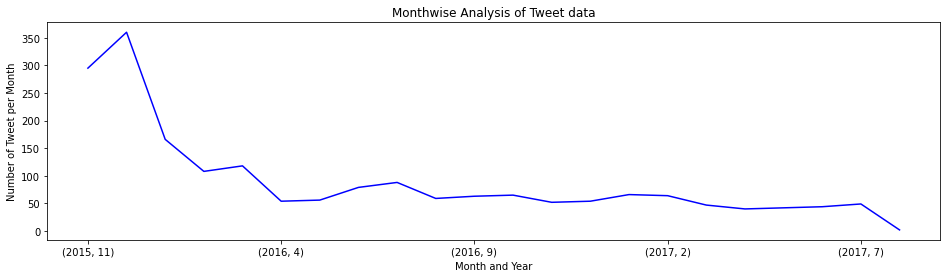

In [80]:
plt.figure(figsize=(16,4))
tweet_count.plot(kind='line', color='blue')
plt.xlabel('Month and Year')
plt.ylabel('Number of Tweet per Month')
plt.title('Monthwise Analysis of Tweet data')

This visualization shows the number of tweets per month. As per data, tweet count is highest in the December 2015 and then in November, 2015. It has been observed that there is drastic decrease in the tweet count in the year 2016. In the year 2017 tweet count is continously decreasing from the month of January to July.

#### Visualization 2

In [81]:
count_type=df_final_clean['type_of_dog'].value_counts()
count_type=count_type.drop(['None','doggo-pupper','doggo-puppo','doggo-floofer'])
count_type.drop([])

pupper     201
doggo       63
puppo       22
floofer      7
Name: type_of_dog, dtype: int64

Text(0.5, 1.0, 'Analysis of various types of dogs')

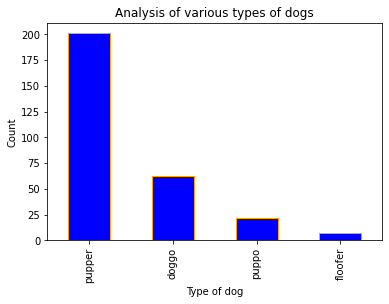

In [83]:
count_type.plot(kind='bar', color='blue',edgecolor='orange')
plt.xlabel('Type of dog')
plt.ylabel('Count')
plt.title('Analysis of various types of dogs')

This visualization shows the distribution of dogs into different types such as pupper, doggo, puppo and floofer. It has been observed that the highest count of dog is pupper.  